In [139]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [140]:
SIGN_LANG_TRAIN_PATH = "./sign_mnist_test.csv"

df = pd.read_csv(SIGN_LANG_TRAIN_PATH)
df.head(2)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180


In [141]:
HEIGHT, WIDTH = 28, 28

In [142]:
im = np.zeros((HEIGHT, WIDTH))
df.loc(0)[0][1]

149

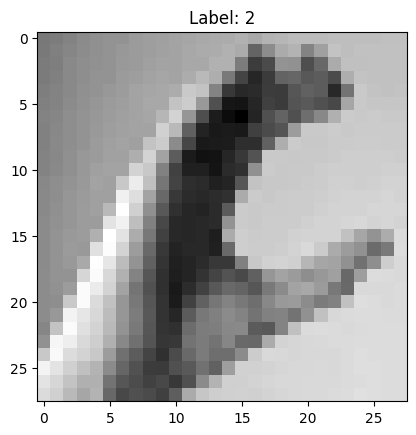

In [143]:
alph = "ABCDEFGHIJKLMNOPQRSTUVWXYZ"
idx = 90
step = WIDTH
start = 1
end = step + 1
im = df.iloc[idx, 1:].values.reshape(28, 28) 
plt.imshow(im, cmap="gray")
label = int(df.iloc[idx][0])
plt.title(f"Label: {label}")
plt.show()

In [144]:
from PIL import Image
print(type(im))
pil_im = Image.fromarray(np.uint8(im))
pil_im.show("Title")

<class 'numpy.ndarray'>


In [145]:
ann = df["label"]
ann.iloc[2]

10

In [146]:
data = df.drop("label", axis=1)
type(data)

pandas.core.frame.DataFrame

In [153]:
optdf = pd.read_csv(SIGN_LANG_TRAIN_PATH)
optdf[optdf["label"] == 24]

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
88,24,179,180,182,182,183,184,186,186,186,...,130,113,135,59,49,166,169,167,146,94
113,24,190,191,194,194,195,195,197,197,197,...,219,218,216,216,216,215,214,213,212,210
117,24,158,160,163,163,164,165,166,166,167,...,192,191,189,188,188,187,186,185,183,182
182,24,88,99,110,118,125,129,129,134,141,...,190,197,197,197,197,197,197,197,198,197
187,24,164,166,168,170,171,174,176,176,176,...,202,200,198,198,197,197,196,195,194,192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7107,24,63,74,85,94,101,105,105,111,117,...,168,176,175,175,175,176,176,176,176,175
7111,24,157,158,160,162,164,166,167,168,168,...,191,190,188,188,187,187,186,185,184,182
7113,24,171,171,171,171,171,172,172,172,172,...,106,119,116,107,87,63,62,66,60,59
7135,24,178,178,178,179,178,179,179,179,179,...,98,115,112,100,77,51,46,48,41,39


In [148]:
# (1, (_, val))
optdf.loc[3, "label"]

0

In [149]:
import torch
import torch.nn as nn

class Model(nn.Module):
    def __init__(self, nf, nt, nl, hs, do):
        super().__init__()
        layers = []
        for _ in range(nl):
            if len(layers) == 0:
                layers.append(nn.Linear(nf, hs))
                layers.append(nn.BatchNorm1d(hs))
                layers.append(nn.Dropout(do))
                layers.append(nn.ReLU())
            else:
	            layers.append(nn.Linear(hs, hs))
	            layers.append(nn.BatchNorm1d(hs))
	            layers.append(nn.Dropout(do))
	            layers.append(nn.ReLU())
        layers.append(nn.Linear(hs, nt))
        self.model = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.model(x)


In [150]:

model = Model(
    nf=3,
    nt=5,
    nl=4,
    hs=24,
    do=0.4
)
model

Model(
  (model): Sequential(
    (0): Linear(in_features=3, out_features=24, bias=True)
    (1): BatchNorm1d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Dropout(p=0.4, inplace=False)
    (3): ReLU()
    (4): Linear(in_features=24, out_features=24, bias=True)
    (5): BatchNorm1d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Dropout(p=0.4, inplace=False)
    (7): ReLU()
    (8): Linear(in_features=24, out_features=24, bias=True)
    (9): BatchNorm1d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): Dropout(p=0.4, inplace=False)
    (11): ReLU()
    (12): Linear(in_features=24, out_features=24, bias=True)
    (13): BatchNorm1d(24, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (14): Dropout(p=0.4, inplace=False)
    (15): ReLU()
    (16): Linear(in_features=24, out_features=5, bias=True)
  )
)